Cài thư viện yolo

In [4]:
!pip install ultralytics

Kết nối với googledrive để lấy dữ liệu

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import YOLO sử dụng yolov8n.pt

In [3]:
from ultralytics import YOLO
# Khởi tạo model YOLOv8
model = YOLO("yolov8n.pt")  # Có thể chọn yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 142MB/s]


thực hiện train với data gồm taajo train, test, val trong các thư mục chứa các ảnh biển số xe và label là các file text chứa tọa độ bounding box

20 epochs, bathc = 16 , patience = 5, imgsz = 640

In [4]:
# Train model
model.train(data="/content/drive/MyDrive/License Plate Recognition.v2i.yolov8/data.yaml", epochs=20, batch=16,patience=5, imgsz=640)

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/License Plate Recognition.v2i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspecti

100%|██████████| 755k/755k [00:00<00:00, 36.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 130MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.1±0.0 MB/s, size: 62.4 KB)


train: Scanning /content/drive/MyDrive/License Plate Recognition.v2i.yolov8/train/labels... 2193 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2193/2193 [22:58<00:00,  1.59it/s]


train: New cache created: /content/drive/MyDrive/License Plate Recognition.v2i.yolov8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2502, len(boxes) = 2509. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.0 MB/s, size: 57.3 KB)


val: Scanning /content/drive/MyDrive/License Plate Recognition.v2i.yolov8/valid/labels... 626 images, 0 backgrounds, 0 corrupt: 100%|██████████| 626/626 [06:38<00:00,  1.57it/s]


val: New cache created: /content/drive/MyDrive/License Plate Recognition.v2i.yolov8/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 714, len(boxes) = 715. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.05G     0.8152      1.623     0.9619          3        640: 100%|██████████| 138/138 [00:49<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]


                   all        626        715      0.853      0.866      0.899      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.55G     0.8489     0.9557     0.9933          2        640: 100%|██████████| 138/138 [00:46<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]


                   all        626        715      0.854      0.799      0.852       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.56G     0.8679     0.7835      1.029          1        640: 100%|██████████| 138/138 [00:47<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.05it/s]

                   all        626        715      0.889      0.848      0.919      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.58G     0.8301     0.6565      0.997          1        640: 100%|██████████| 138/138 [00:45<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]

                   all        626        715      0.935       0.93      0.969      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.59G     0.7883        0.6      0.988          2        640: 100%|██████████| 138/138 [00:45<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        626        715      0.894      0.847      0.911      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.61G     0.7796     0.5678     0.9811          2        640: 100%|██████████| 138/138 [00:45<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.04it/s]

                   all        626        715      0.934      0.911      0.971      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.62G     0.7668     0.5219      0.977          5        640: 100%|██████████| 138/138 [00:45<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]

                   all        626        715      0.954      0.951      0.983      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.65G     0.7467     0.5029     0.9607          4        640: 100%|██████████| 138/138 [00:45<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.48it/s]


                   all        626        715      0.952      0.951      0.977      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.66G     0.7173     0.4768     0.9454          1        640: 100%|██████████| 138/138 [00:45<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.74it/s]

                   all        626        715      0.948       0.95      0.986      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.68G     0.7088     0.4652     0.9462          1        640: 100%|██████████| 138/138 [00:45<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]

                   all        626        715       0.95      0.954      0.986       0.83


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.69G     0.6634     0.4281     0.9515          1        640: 100%|██████████| 138/138 [00:46<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        626        715      0.974      0.952      0.986      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.71G     0.6596     0.4061     0.9482          1        640: 100%|██████████| 138/138 [00:43<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        626        715      0.964      0.955      0.984      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.72G     0.6497     0.3945     0.9384          1        640: 100%|██████████| 138/138 [00:43<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]

                   all        626        715      0.971      0.954      0.986      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.75G     0.6279     0.3767     0.9283          1        640: 100%|██████████| 138/138 [00:43<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]

                   all        626        715      0.957      0.959      0.987      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.76G     0.6215     0.3656     0.9243          1        640: 100%|██████████| 138/138 [00:43<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]

                   all        626        715      0.963      0.958      0.988      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.79G     0.6006     0.3491     0.9058          1        640: 100%|██████████| 138/138 [00:43<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        626        715      0.954      0.972      0.988       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.79G     0.5932     0.3404     0.9087          1        640: 100%|██████████| 138/138 [00:43<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]

                   all        626        715      0.961      0.966      0.987      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.82G     0.5731     0.3233     0.8977          1        640: 100%|██████████| 138/138 [00:43<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.73it/s]

                   all        626        715      0.962      0.968      0.989      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.83G     0.5585     0.3149     0.8974          1        640: 100%|██████████| 138/138 [00:44<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.50it/s]

                   all        626        715      0.957      0.974      0.988      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.85G      0.547     0.3029     0.8833          1        640: 100%|██████████| 138/138 [00:43<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.11it/s]

                   all        626        715      0.964      0.971       0.99      0.868



20 epochs completed in 0.294 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:10<00:00,  1.97it/s]


                   all        626        715      0.964      0.971       0.99      0.868
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cafccf25d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Lưu lại model đã train

In [10]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val()


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 25.6±8.9 MB/s, size: 51.8 KB)


val: Scanning /content/drive/MyDrive/License Plate Recognition.v2i.yolov8/valid/labels.cache... 626 images, 0 backgrounds, 0 corrupt: 100%|██████████| 626/626 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 714, len(boxes) = 715. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:11<00:00,  3.47it/s]


                   all        626        715      0.964      0.971       0.99      0.868
Speed: 0.9ms preprocess, 4.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val


kiểm tra, đánh giá độ chính xác của model

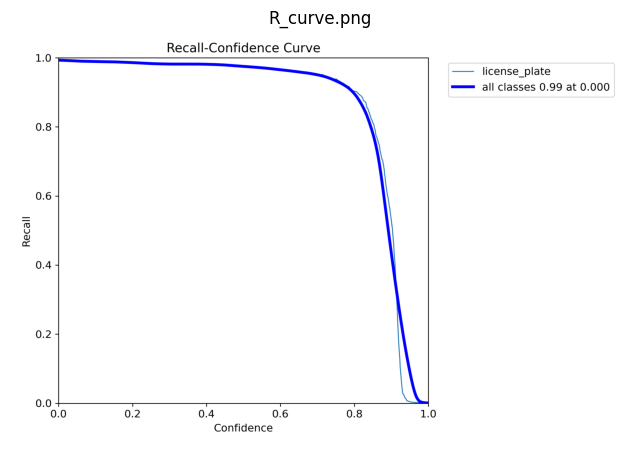

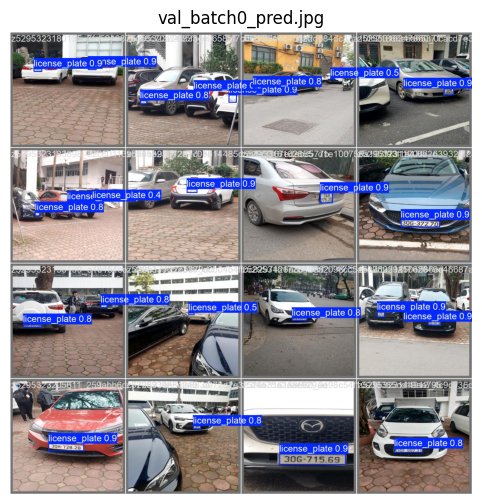

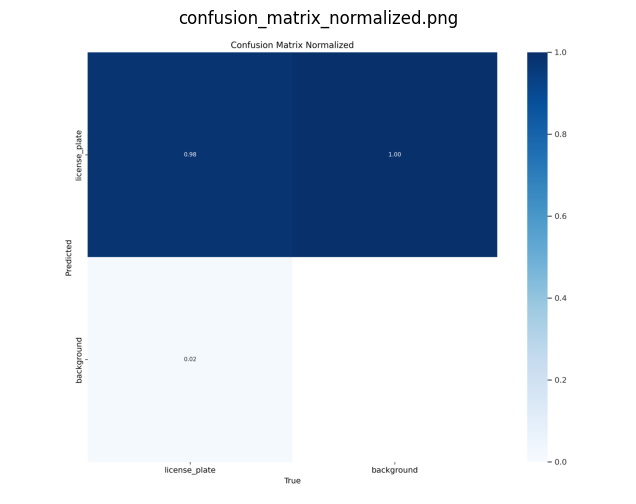

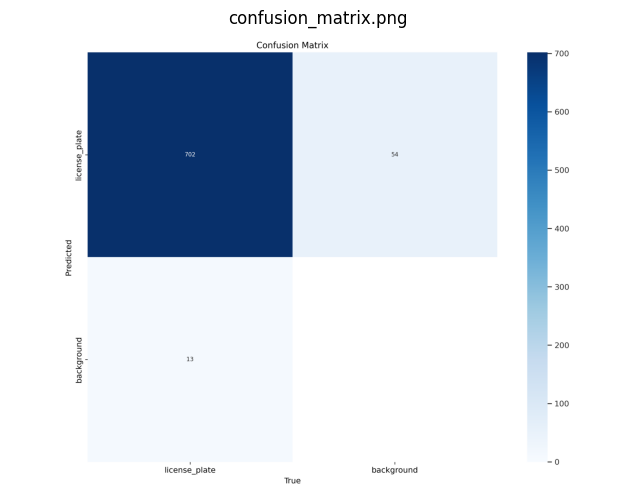

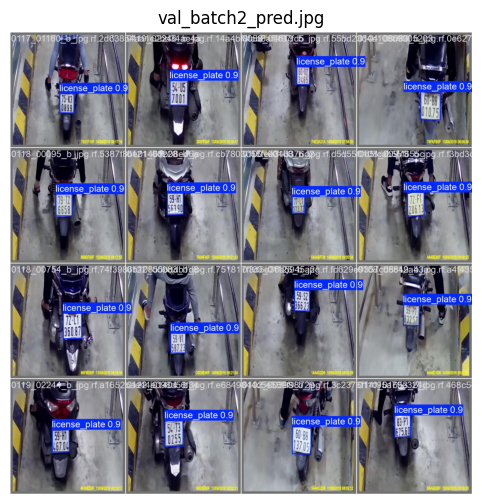

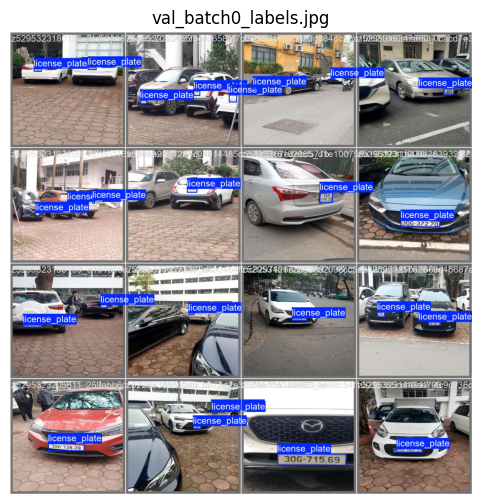

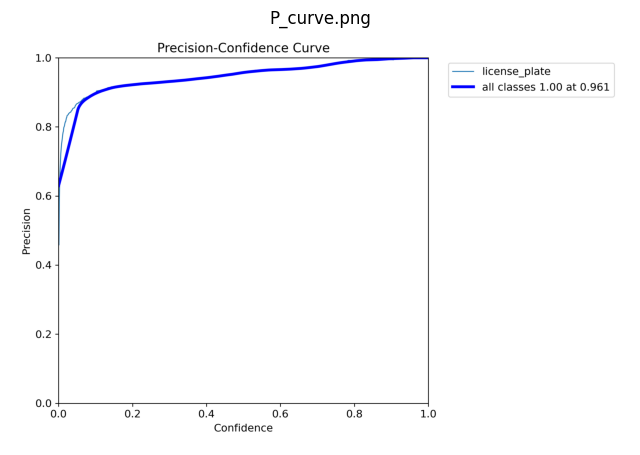

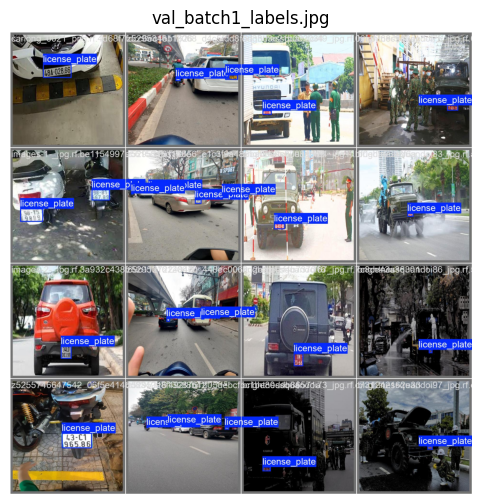

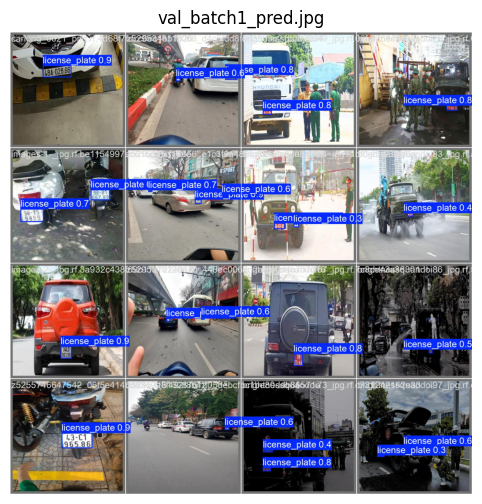

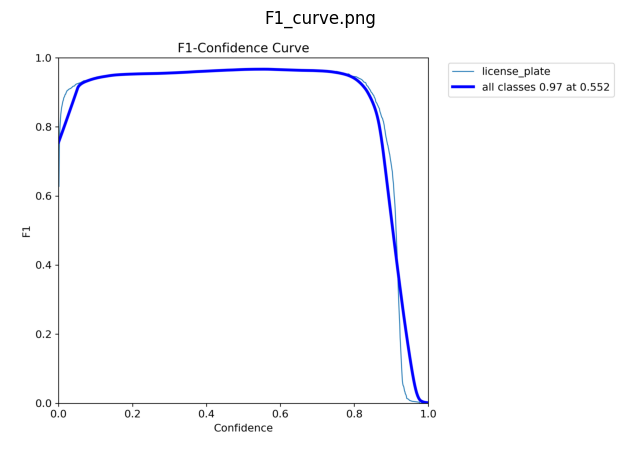

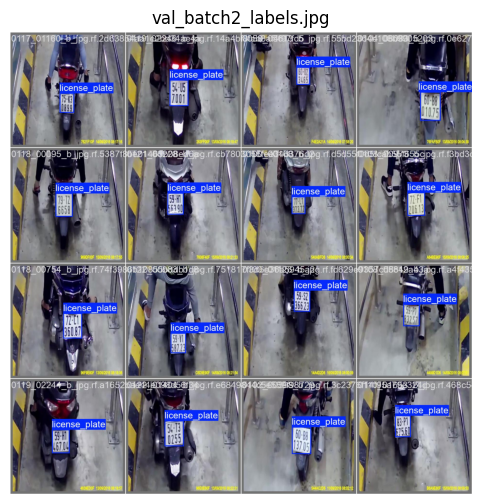

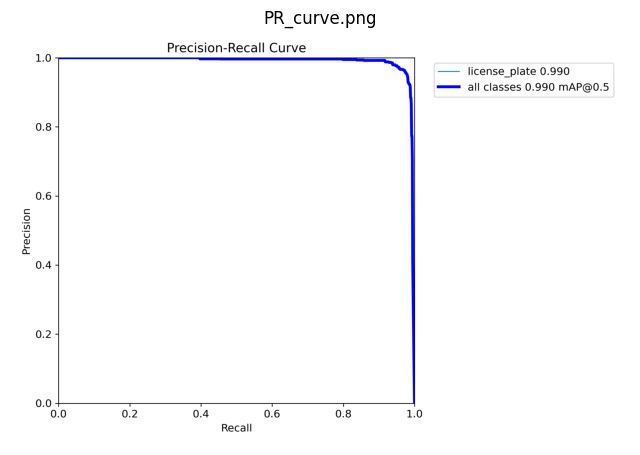

In [13]:
import os
import cv2
import matplotlib.pyplot as plt
val_results_path = "/content/runs/detect/val"

# Lấy danh sách tất cả ảnh trong thư mục
image_files = [f for f in os.listdir(val_results_path) if f.endswith(".jpg") or f.endswith(".png")]

# Hiển thị từng ảnh
for image_file in image_files:
    img = cv2.imread(os.path.join(val_results_path, image_file))  # Đọc ảnh
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển BGR -> RGB để hiển thị đúng màu

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")  # Ẩn trục tọa độ
    plt.title(image_file)
    plt.show()

import các thư viện để test

In [1]:
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
from ultralytics import YOLO

In [2]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

Cài pillow và vietocr để có thể trích xuất thông số của biển số xe ra text

In [3]:
!pip install vietocr
!pip install pillow

In [3]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from PIL import Image

cấu hình vietocr

In [4]:
config = Cfg.load_config_from_name('vgg_transformer')
config['device'] = 'cuda'  # Dùng GPU nếu có
vietocr_model = Predictor(config)

c:\Users\lyxnp\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight C:\Users\lyxnp\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


import model vừa train

In [5]:
from ultralytics import YOLO
# Load model YOLOv8
model = YOLO("E:/ComputerVision/FinalReport/best.pt")  # Thay đường dẫn nếu cần

định nghĩa hàm đọc ảnh từ url và trích xuất ra biển số xe

In [6]:
def detect_and_recognize_plate(image_url):
    """
    Hàm này thực hiện các bước:
    1. Tải ảnh từ URL
    2. Dùng YOLOv8 để phát hiện biển số xe
    3. Cắt vùng biển số ra khỏi ảnh gốc
    4. Dùng VietOCR để nhận diện chữ trên biển số
    """
    # 🔹 Bước 1: Tải ảnh từ URL
    resp = urllib.request.urlopen(image_url)
    image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển BGR -> RGB

    # 🔹 Bước 2: Dự đoán biển số bằng YOLOv8
    results = model(image)

    # 🔹 Bước 3: Duyệt qua các bounding boxes và nhận diện biển số
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Lấy tọa độ bounding box

            # Cắt biển số từ ảnh
            license_plate = image_rgb[y1:y2, x1:x2]

            # Hiển thị ảnh biển số
            plt.figure(figsize=(4, 2))
            plt.imshow(license_plate)
            plt.axis("off")
            plt.title("License Plate")
            plt.show()

            # 🔹 Chuyển ảnh sang định dạng phù hợp cho VietOCR (PIL Image)
            license_plate_pil = Image.fromarray(license_plate)

            # 🔹 Nhận diện chữ trên biển số
            text = vietocr_model.predict(license_plate_pil)
            print("🚘 Biển số xe:", text)


In [7]:
import urllib.request
import numpy as np
import cv2
import matplotlib.pyplot as plt

url = "https://img.tinxe.vn/crop/620x324/2020/07/04/vwnbOqjE/otoso1-lam-bien-so-dai-1-7111.jpg"
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)

# Chuyển đổi sang ảnh OpenCV
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Chuyển từ BGR -> RGB để hiển thị đúng màu
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh gốc
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()

: 

In [ ]:
# Predict với YOLOv8
results = model(image)

# Hiển thị kết quả trực tiếp
for result in results:
    result.show()  # Hiển thị ngay trên Colab

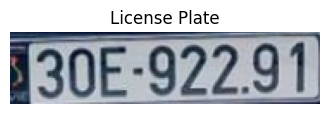

In [16]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Lấy tọa độ (xmin, ymin, xmax, ymax)

        # Cắt biển số ra khỏi ảnh gốc
        license_plate = image_rgb[y1:y2, x1:x2]

        # Hiển thị ảnh biển số
        plt.figure(figsize=(4, 2))
        plt.imshow(license_plate)
        plt.axis("off")
        plt.title("License Plate")
        plt.show()


0: 352x640 1 license_plate, 7.7ms
Speed: 2.7ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)


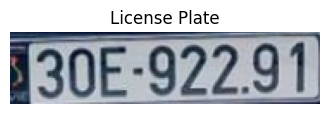

🚘 Biển số xe: 30E-922.91


In [17]:
detect_and_recognize_plate(url)